In [1]:
import pandas as pd

In [2]:
# Read whale returns
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True)
whale_returns.dropna(inplace=True)

In [3]:
# Read algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True)
algo_returns.dropna(inplace=True)

In [4]:
# Read S&P TSX 60 Index historical prices
sp_tsx_history = pd.read_csv('sp_tsx_history.csv', index_col='Date', parse_dates=True)
sp_tsx_history.sort_index(ascending=True, inplace=True)
sp_tsx_history.dropna(inplace=True)

In [5]:
# Check for null values
print(whale_returns.isna().sum())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


In [6]:
# Remove null values
whale_returns.dropna(inplace=True)

In [7]:
# Check for null values
print(algo_returns.isna().sum())

Algo 1    0
Algo 2    0
dtype: int64


In [8]:
# Remove null values
algo_returns.dropna(inplace=True)

In [9]:
# Check for null values
print(sp_tsx_history.isna().sum())

Close    0
dtype: int64


In [10]:
# Remove null values
sp_tsx_history.dropna(inplace=True)

In [11]:
# Remove dollar signs and convert to numeric values
whale_returns = whale_returns.replace('[\$,]', '', regex=True).astype(float)

In [12]:
# Remove any non-numeric characters and convert to numeric values
algo_returns = algo_returns.replace('[^0-9.-]', '', regex=True).astype(float)

In [15]:
# Remove dollar signs and commas and convert to numeric values
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype(str).str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float)

In [17]:
# Load S&P TSX 60 data
sp_tsx_history = pd.read_csv('SP_TSX_History.csv', index_col='Date')

In [20]:
# Calculate daily returns
sp_tsx_history['Close'] = pd.to_numeric(sp_tsx_history['Close'], errors='coerce')
sp_tsx_history.dropna(inplace=True)
sp_tsx_returns = sp_tsx_history['Close'].pct_change()

In [21]:
# Join Whale Returns and Algorithmic Returns
combined_returns = whale_returns.join(algo_returns, how='outer')

In [22]:
# Join S&P TSX 60 Returns
combined_returns = combined_returns.join(sp_tsx_returns, how='outer')

In [24]:
# Rename columns
combined_returns.columns = ['Date', 'AAPL', 'GOOG', 'TSLA', 'Whale Returns', 'Algo Returns', 'S&P TSX 60 Returns']

In [25]:
# Calculate daily returns for all portfolios
daily_returns = combined_returns.pct_change()

<AxesSubplot: title={'center': 'Daily Returns of All Portfolios'}, xlabel='Date'>

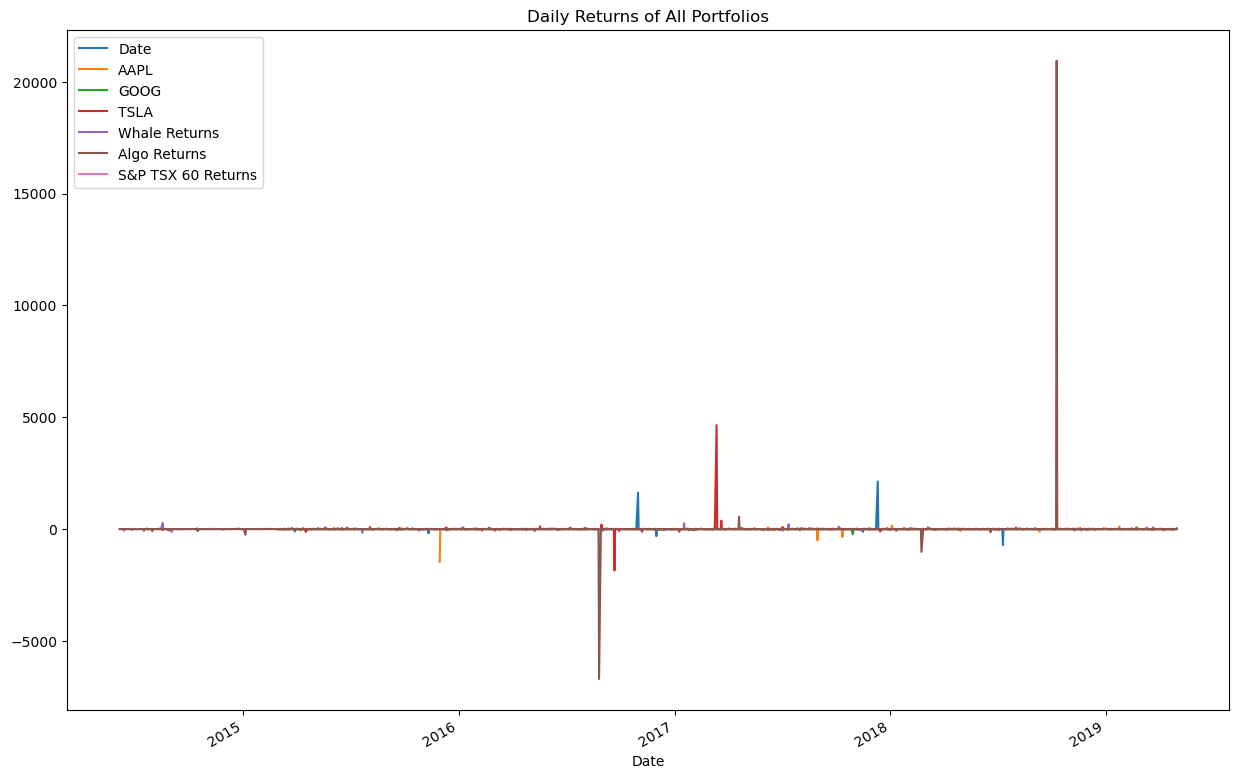

In [26]:
# Plot daily returns
daily_returns.plot(figsize=(15, 10), title='Daily Returns of All Portfolios')

In [28]:
# Calculate cumulative returns for all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1

<AxesSubplot: title={'center': 'Cumulative Returns of All Portfolios'}, xlabel='Date'>

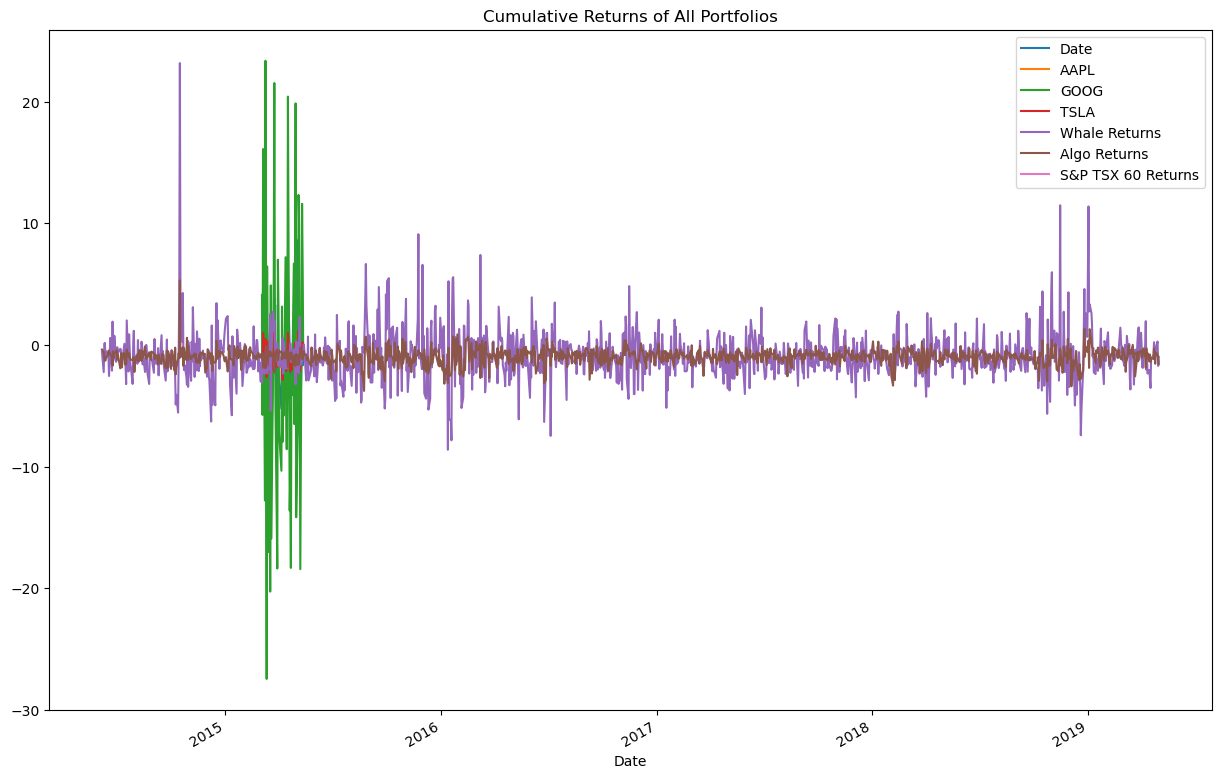

In [29]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(15, 10), title='Cumulative Returns of All Portfolios')

In [32]:
import numpy as np

# create an array with NaN values
a = np.array([1, 2, np.nan, 4])

# remove NaN values
a = a[~np.isnan(a)]

# perform reduction operation
result = np.sum(a)

In [34]:
# Fill missing values with 0
daily_returns.fillna(0, inplace=True)

In [37]:
daily_returns.fillna(0, inplace=True)

/Users/Playstonic/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<AxesSubplot: >

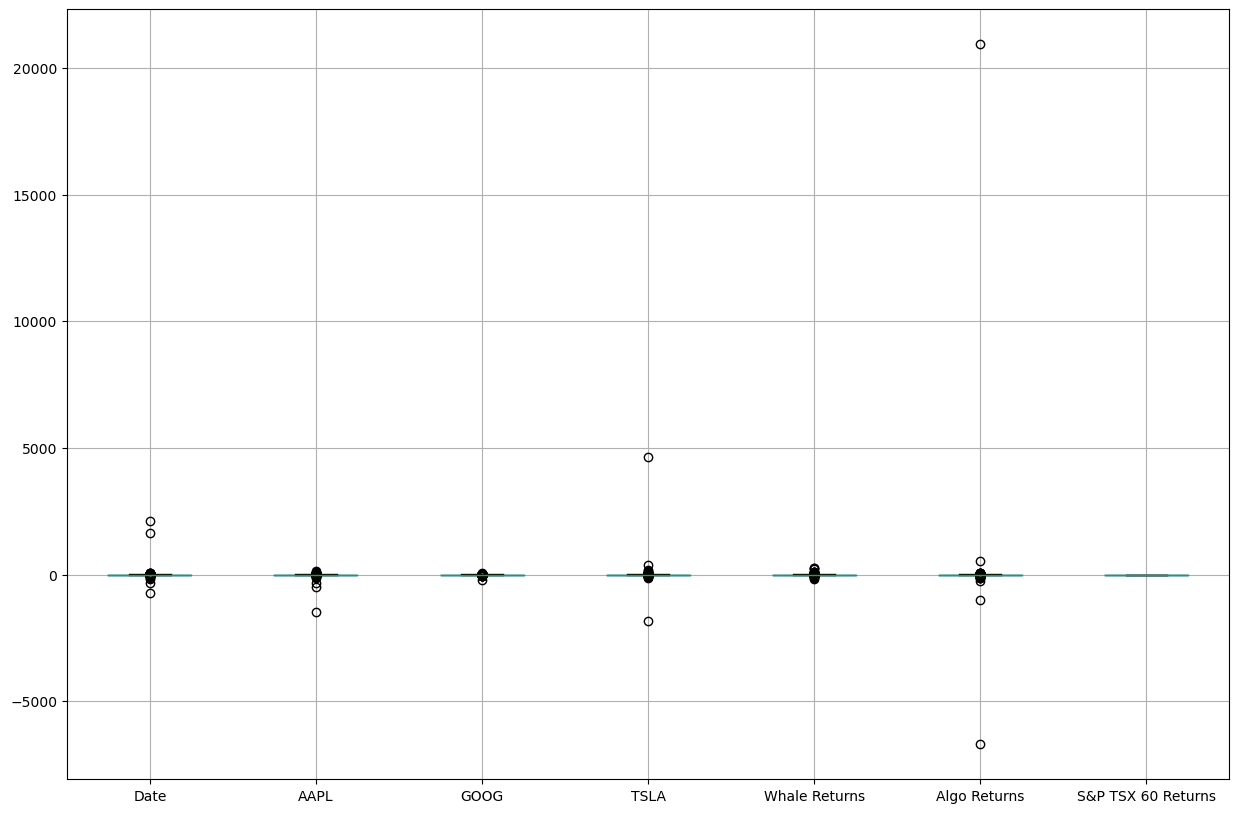

In [38]:
# Create box plot for all portfolios
daily_returns.boxplot(figsize=(15, 10))

In [39]:
# Calculate the standard deviation for all portfolios
std_deviation = daily_returns.std()

print("Standard deviation of all portfolios:\n")
print(std_deviation)


Standard deviation of all portfolios:

Date                         NaN
AAPL                         NaN
GOOG                         NaN
TSLA                         NaN
Whale Returns          16.978709
Algo Returns          624.136738
S&P TSX 60 Returns      0.000000
dtype: float64


In [41]:
# Compare the standard deviation of each portfolio with that of the S&P TSX 60
print("Standard deviation of all portfolios compared to S&P TSX 60:\n")
print(std_deviation > std_deviation['S&P TSX 60 Returns'])


Standard deviation of all portfolios compared to S&P TSX 60:

Date                  False
AAPL                  False
GOOG                  False
TSLA                  False
Whale Returns          True
Algo Returns           True
S&P TSX 60 Returns    False
dtype: bool


In [42]:
# Calculate the annualized standard deviation for each portfolio
annualized_std = daily_returns.std() * np.sqrt(252)
print(annualized_std)


Date                          NaN
AAPL                          NaN
GOOG                          NaN
TSLA                          NaN
Whale Returns          269.528652
Algo Returns          9907.863556
S&P TSX 60 Returns       0.000000
dtype: float64


<AxesSubplot: xlabel='Date'>

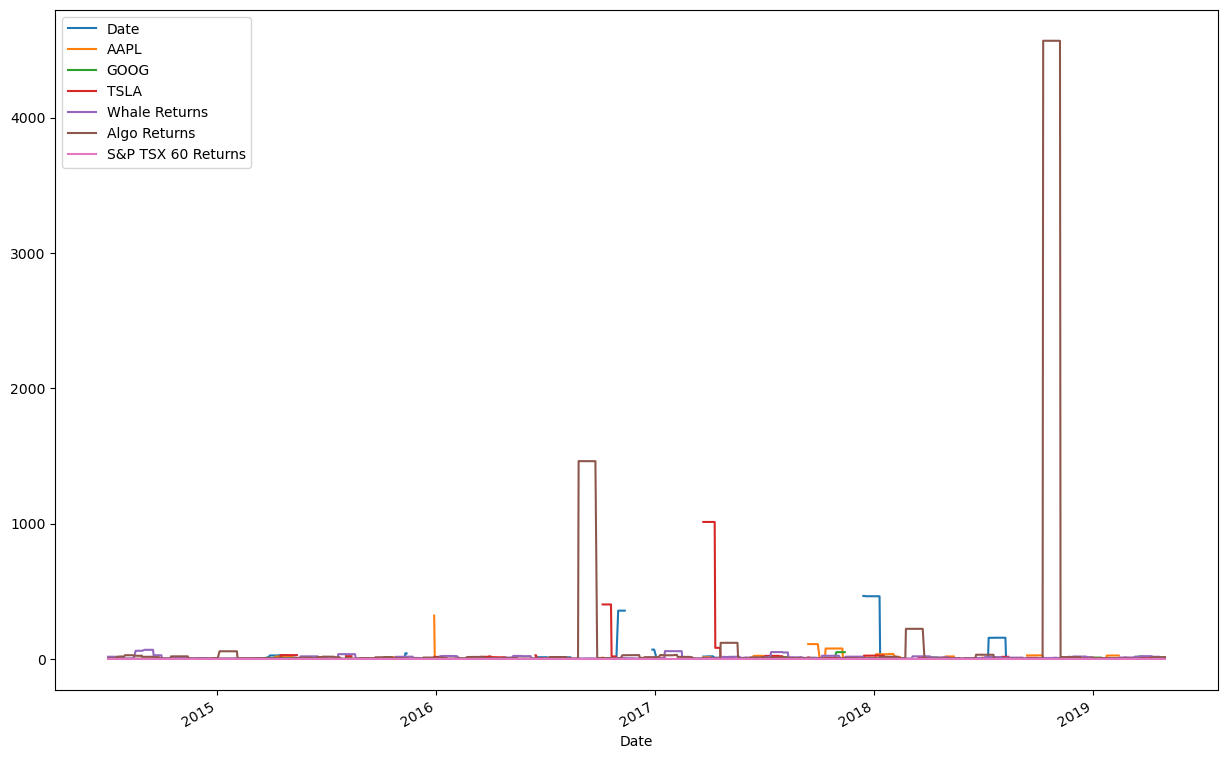

In [43]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
rolling_std = daily_returns.rolling(window=21).std()
rolling_std.plot(figsize=(15, 10))


In [45]:
import seaborn as sns

<AxesSubplot: >

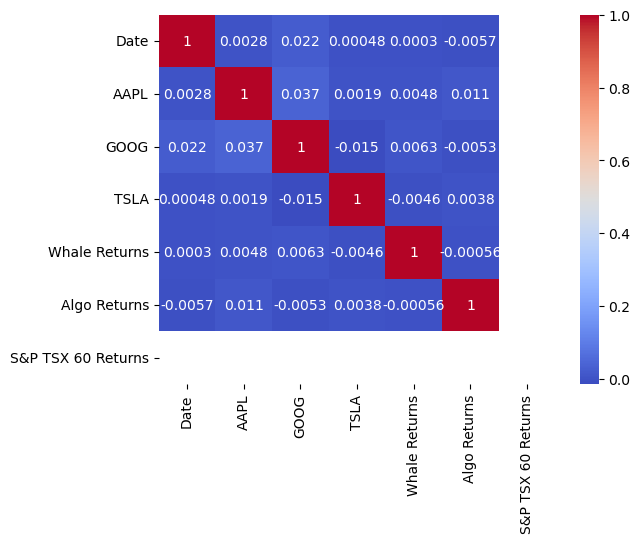

In [46]:
# Calculate and plot the correlation between each stock to determine which portfolios may mimic the S&P 500.
corr = daily_returns.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [47]:
import statsmodels.api as sm


In [48]:
# Choose Whale Returns portfolio
portfolio = daily_returns['Whale Returns'].dropna()

In [49]:
# Get S&P 500 daily returns
SP500 = daily_returns['S&P TSX 60 Returns'].dropna()

In [50]:
# Run linear regression
X = sm.add_constant(SP500)
model = sm.OLS(portfolio, X)
results = model.fit()

In [51]:
# Print beta
print('Beta:', results.params[1])

Beta: 0.0


In [53]:
import matplotlib.pyplot as plt

In [55]:
# Calculate the daily risk-free rate of return
rf_rate = 0

In [56]:
# Calculate excess returns for all portfolios
excess_returns = daily_returns.sub(rf_rate, axis=0)

In [57]:
# Calculate annualized Sharpe ratio for all portfolios
sharpe_ratios = (252 ** 0.5) * excess_returns.mean() / excess_returns.std()

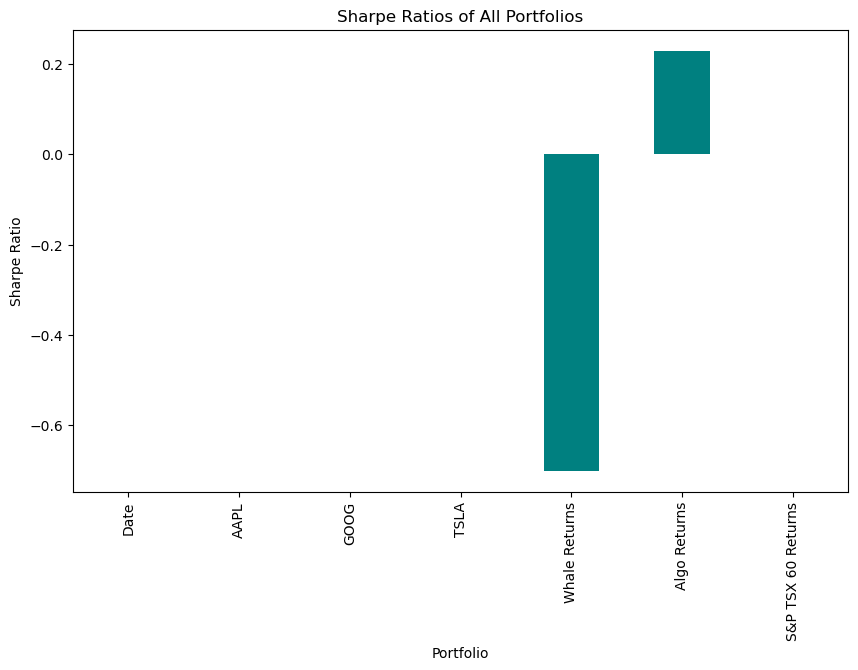

In [58]:
# Plot the Sharpe ratios using a bar plot
sharpe_ratios.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Sharpe Ratios of All Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.show()

In [60]:
risk_free_rate = 0.02 # assuming a 2% annual return for a low-risk investment


In [62]:
# Calculate the average daily return and Sharpe ratio of each portfolio
avg_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()
sharpe_ratio = (avg_daily_return - risk_free_rate) / std_daily_return

# Compare the average daily return and Sharpe ratio of the algorithmic strategies with those of the market and whales portfolios
print('Average daily return:')
print('Market: ', avg_daily_return['S&P TSX 60 Returns'])
print('Whale Returns: ', avg_daily_return['Whale Returns'])
print('Algo Returns: ', avg_daily_return['Algo Returns'])
print()
print('Sharpe ratio:')
print('Market: ', sharpe_ratio['S&P TSX 60 Returns'])
print('Whale Returns: ', sharpe_ratio['Whale Returns'])
print('Algo Returns: ', sharpe_ratio['Algo Returns'])

Average daily return:
Market:  0.0
Whale Returns:  -0.7500981403076571
Algo Returns:  9.022771815408008

Sharpe ratio:
Market:  -inf
Whale Returns:  -0.045356695391352606
Algo Returns:  0.0144243581071341


<AxesSubplot: title={'center': 'Sharpe Ratios'}>

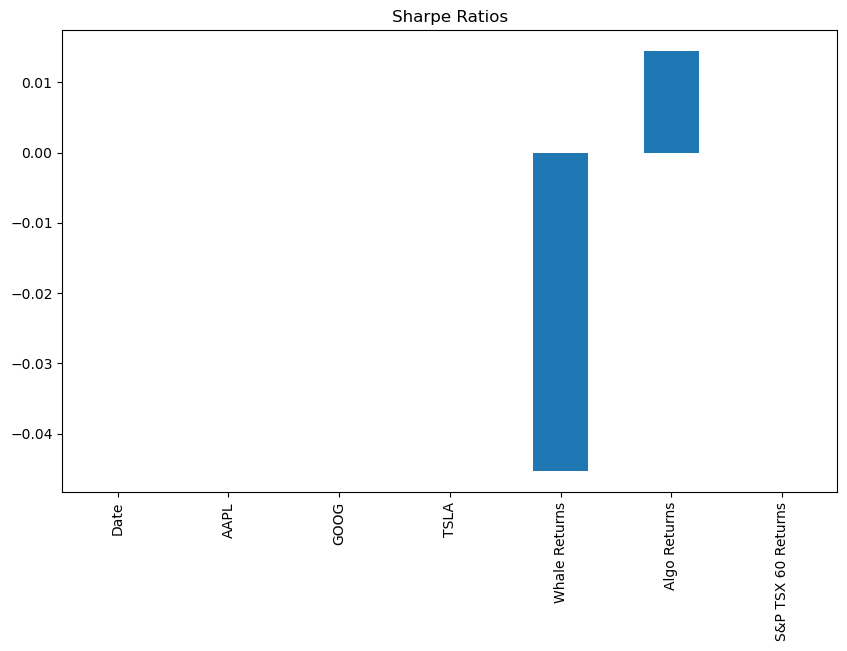

In [63]:
sharpe_ratio.plot(kind='bar', title='Sharpe Ratios', figsize=(10,6))


In [64]:
# Loading the CSV files into Pandas DataFrames
df_stock1 = pd.read_csv('Tesla.csv', index_col='Date', parse_dates=True)
df_stock2 = pd.read_csv('BRK.B.csv', index_col='Date', parse_dates=True)
df_stock3 = pd.read_csv('VOO.csv', index_col='Date', parse_dates=True)

In [65]:
# Calculate the daily returns for each stock
returns_stock1 = df_stock1['Close'].pct_change()
returns_stock2 = df_stock2['Close'].pct_change()
returns_stock3 = df_stock3['Close'].pct_change()

In [69]:
# Concatenate the daily returns into a single DataFrame
df_returns = pd.concat([returns_stock1, returns_stock2, returns_stock3], axis=1)
df_returns.columns = ['Tesla', 'Berkshire Hathaway', 'Vanguard S&P 500']

In [67]:
# Define the weights for each stock in the portfolio
weights = [0.33, 0.33, 0.33]  # Assumes equal weight for each stock

In [100]:
# Calculate the weighted returns
df_returns['portfolio'] = (weights[0] * df_returns['Tesla'] +
                           weights[1] * df_returns['Berkshire Hathaway'] +
                           weights[2] * df_returns['Vanguard S&P 500'])

In [106]:
# Combine all the returns data into a single DataFrame
df_all_returns = sp_tsx_history[['Close']].join([whale_returns, algo_returns, my_portfolio_returns]).pct_change()
df_all_returns.columns = ['S&P 500 Returns',                           'Whale Returns', 'Whale Returns 2', 'Whale Returns 3', 'Whale Returns 4',                          'Algo Returns', 'Algo Returns 2', 'My Portfolio Returns']


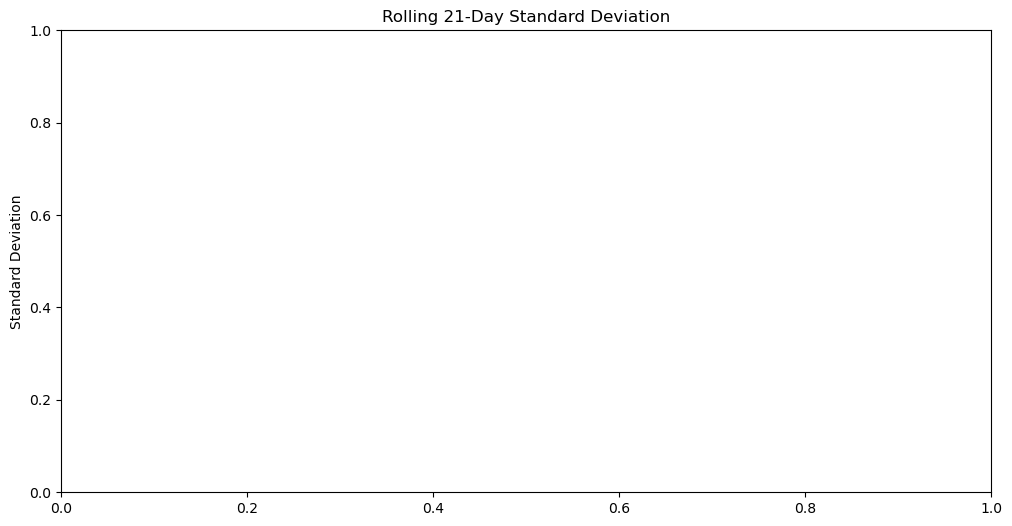

/Users/Playstonic/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/Playstonic/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


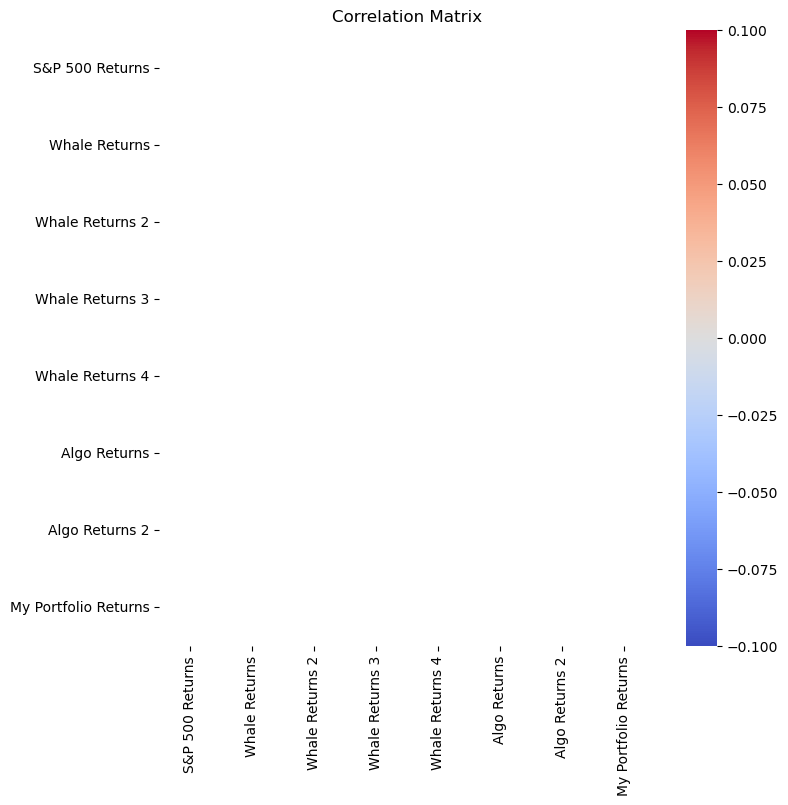

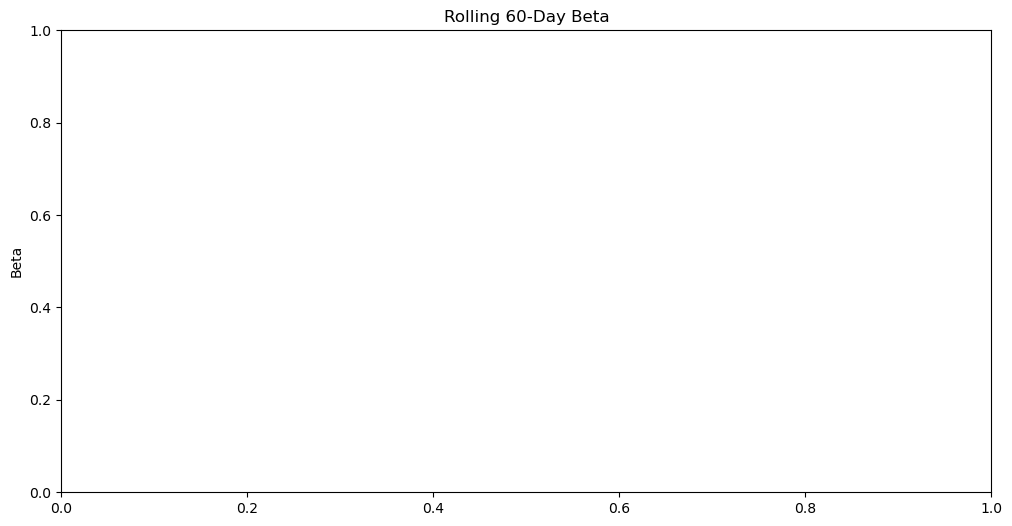

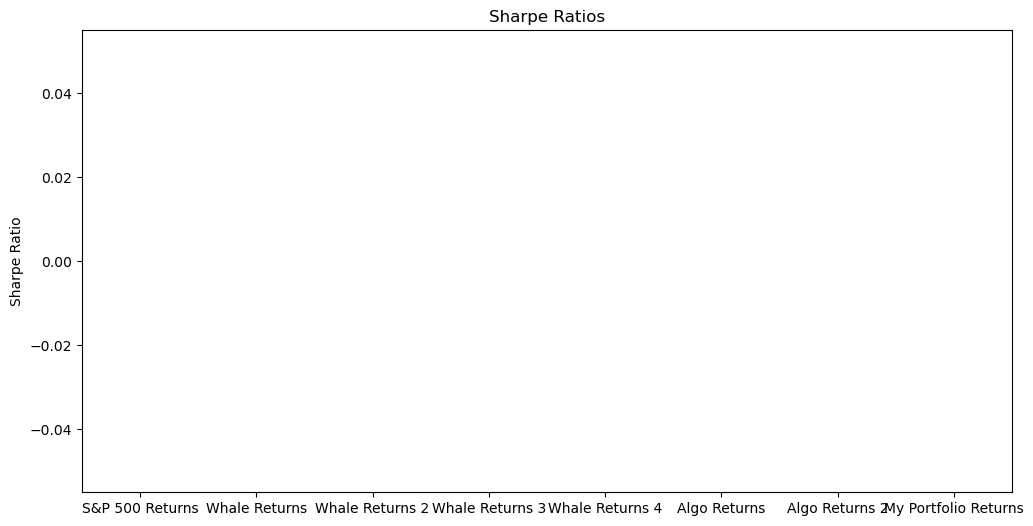

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate annualized standard deviation
annualized_std = df_all_returns.std() * np.sqrt(252)

# Calculate rolling standard deviation
rolling_std = df_all_returns.rolling(window=21).std()

# Calculate correlation
correlation = df_all_returns.corr()

# Calculate rolling beta
rolling_covariance = df_all_returns['My Portfolio Returns'].rolling(window=60).cov(df_all_returns['S&P 500 Returns'])
rolling_variance = df_all_returns['S&P 500 Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance

# Calculate Sharpe ratios
risk_free_rate = 0.05
excess_returns = df_all_returns - risk_free_rate
sharpe_ratios = excess_returns.mean() / excess_returns.std() * np.sqrt(252)

# Plot rolling standard deviation
plt.figure(figsize=(12,6))
sns.lineplot(data=rolling_std)
plt.title('Rolling 21-Day Standard Deviation')
plt.ylabel('Standard Deviation')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

# Plot rolling beta
plt.figure(figsize=(12,6))
sns.lineplot(data=rolling_beta)
plt.title('Rolling 60-Day Beta')
plt.ylabel('Beta')
plt.show()

# Plot Sharpe ratios
plt.figure(figsize=(12,6))
sns.barplot(x=sharpe_ratios.index, y=sharpe_ratios.values)
plt.title('Sharpe Ratios')
plt.ylabel('Sharpe Ratio')
plt.show()
